In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['flower_val'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_val
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df['flower_name'] = df.flower_val.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_val,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df0 = df[df.flower_val == 0]
df1 = df[df.flower_val == 1]
df2 = df[df.flower_val == 2]

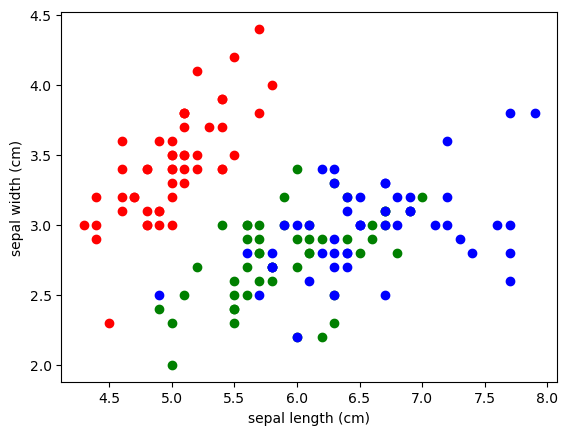

In [9]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'red')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'green')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'blue')

In [10]:
inputs = df.drop(['flower_val', 'flower_name'], axis = 'columns')
targets = df['flower_val']

In [11]:
inputs.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
(x_train, x_test, y_train, y_test) = train_test_split(inputs, targets, train_size = 0.8, random_state = 30)

In [13]:
len(x_train), len(x_test)

(120, 30)

In [14]:
# With metric as minkowski and p = 2, it refers to calculation of Euclidean distance
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)  # here n_neighbors is k
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.score(x_test, y_test)

0.9333333333333333

In [16]:
y_predicted = knn.predict(x_test)

In [17]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[12,  0,  0],
       [ 0,  7,  2],
       [ 0,  0,  9]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

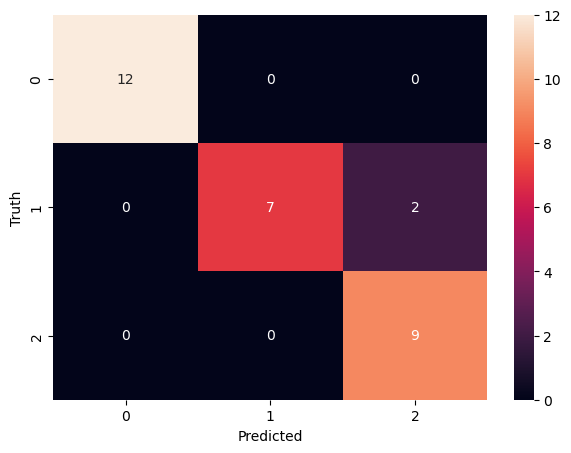

In [18]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30

